In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k_kr=2 #поправка на крешерный прибор

init={
    'T_0': 288.15,
    
    'd': 0.115,
    'q': 8,
    'fi_1': 1.02,
    'p_0': 10e6,
    'l_d': 4.977+0.17,
    'n_s': 1,
    'p_0a': 0, # атмосферное давление
    'c_0a': 340, #скорость звука в воздухе
    'k_a': 1.4, # показатель адиабаты воздуха
    
    'dt': 1e-6,
    'n': int(1e6),
    
    'W_0': (10.05-0.303)*1e-3,
    
    # ПОД-35/5К
    'w_1': 7.4,
    'I_e_1': 1.262*1e6,
    'f_1': 1.182e6,
    'delta_1': 1580,
    'b_1': 1.079*1e-3,
    'z_e_1': 1,
    'kappa_1_1': 1,
    'lamda_1_1': 0,
    'kappa_2_1': 0,
    'lamda_2_1': 0,
    'k_g_1': 1.231,
    'k_I_1': 0.0016,
    'k_f_1':0.00025,
    'T_c_1': 3347,


    # 20/1 Тр ПОД-35/5К
    'w_2': 0,
    'I_e_2': 1.17*1e6,
    'f_2': 1.159e6,
    'delta_2': 1600,
    'b_2': 1.079*1e-3,
    'z_e_2': 1,
    'kappa_1_2': 1,
    'lamda_1_2': 0,
    'kappa_2_2': 0,
    'lamda_2_2': 0,
    'k_g_2': 1.231,
    'k_I_2': 0.0016,
    'k_f_2':0.00030,
    'T_c_2': 3387,
    
    # пламягаситель ВТХ-20
    'w_3': 0.05,
    'I_e_3': 0.39*1e6,
    'f_3': 0.771e6,
    'delta_3': 1600,
    'b_3': 0.971*1e-3,
    'z_e_3': 1,
    'kappa_1_3': 1.086,
    'lamda_1_3': -0.08,
    'kappa_2_3': 0,
    'lamda_2_3': 0,
    'k_g_3': 1.227,
    'k_I_3': 0.0022,
    'k_f_3':0.0007,
    'T_c_3': 1875,
    
    
    #воспламенитель КЗДП-2
    'k_ign': 1.22,
    'b_ign':0.6*1e-3,
    'f_ign': 0.26*1e6,
    'T_ign': 2427,
    'delta_ign': 1700,
    'w_ign': 0.085,
    
    
}


In [3]:
class Raschet():
    def __init__(self, INIT):
        
        self.T_0=INIT['T_0']
        
        self.d=INIT['d']
        self.q=INIT['q']
        self.fi_1=INIT['fi_1']
        self.p_0=INIT['p_0']
        self.l_d=INIT['l_d']
        self.n_s=INIT['n_s']
        self.S=np.pi*self.d**2*self.n_s/4
        
        self.p_0a=INIT['p_0a']
        self.c_0a=INIT['c_0a']
        self.k_a=INIT['k_a']

        self.W_0=INIT['W_0']

        self.l_0=self.W_0/self.S

        self.w_1=INIT['w_1']
        self.I_e_1=INIT['I_e_1']
        self.f_1=INIT['f_1']
        self.delta_1=INIT['delta_1']
        self.b_1=INIT['b_1']
        self.z_e_1=INIT['z_e_1']
        self.kappa_1_1=INIT['kappa_1_1']
        self.lamda_1_1=INIT['lamda_1_1']
        self.kappa_2_1=INIT['kappa_2_1']
        self.lamda_2_1=INIT['lamda_2_1']
        self.k_1=INIT['k_g_1']
        self.k_I_1=INIT['k_I_1']
        self.k_f_1=INIT['k_f_1']
        self.T_c_1=INIT['T_c_1']
        
        self.psi_s_1=self.kappa_1_1*(1+self.lamda_1_1)
        self.R_g_1=self.f_1/self.T_c_1
        self.I_e_1=self.I_e_1*(1-self.k_I_1*(self.T_0-288.15))
        self.f_1=self.f_1*(1+self.k_f_1*(self.T_0-288.15))
        
        self.w_2=INIT['w_2']
        self.I_e_2=INIT['I_e_2']
        self.f_2=INIT['f_2']
        self.delta_2=INIT['delta_2']
        self.b_2=INIT['b_2']
        self.z_e_2=INIT['z_e_2']
        self.kappa_1_2=INIT['kappa_1_2']
        self.lamda_1_2=INIT['lamda_1_2']
        self.kappa_2_2=INIT['kappa_2_2']
        self.lamda_2_2=INIT['lamda_2_2']
        self.k_2=INIT['k_g_2']
        self.k_I_2=INIT['k_I_2']
        self.k_f_2=INIT['k_f_2']
        self.T_c_2=INIT['T_c_2']
        self.psi_s_2=self.kappa_1_2*(1+self.lamda_1_2)
        self.R_g_2=self.f_2/self.T_c_2        
        self.I_e_2=self.I_e_2*(1-self.k_I_2*(self.T_0-288.15))
        self.f_2=self.f_2*(1+self.k_f_2*(self.T_0-288.15))
           
        
        self.w_3=INIT['w_3']
        self.I_e_3=INIT['I_e_3']
        self.f_3=INIT['f_3']
        self.delta_3=INIT['delta_3']
        self.b_3=INIT['b_3']
        self.z_e_3=INIT['z_e_3']
        self.kappa_1_3=INIT['kappa_1_3']
        self.lamda_1_3=INIT['lamda_1_3']
        self.kappa_2_3=INIT['kappa_2_3']
        self.lamda_2_3=INIT['lamda_2_3']
        self.k_3=INIT['k_g_3']
        self.k_I_3=INIT['k_I_3']
        self.k_f_3=INIT['k_f_3']
        self.T_c_3=INIT['T_c_3']
        self.psi_s_3=self.kappa_1_3*(1+self.lamda_1_3)
        self.R_g_3=self.f_3/self.T_c_3  
        self.I_e_3=self.I_e_3*(1-self.k_I_3*(self.T_0-288.15))
        self.f_3=self.f_3*(1+self.k_f_3*(self.T_0-288.15))        
        
        self.k_ign=INIT['k_ign']
        self.b_ign=INIT['b_ign']
        self.f_ign=INIT['f_ign']
        self.T_ign=INIT['T_ign']
        self.R_ign=self.f_ign/self.T_ign
        delta_ign=INIT['delta_ign']
        #self.p_ign=INIT['p_ign']
        self.w_ign=INIT['w_ign']
        
        self.C_1=self.w_1/(self.w_1+self.w_2+self.w_3)      
        self.C_2=self.w_2/(self.w_1+self.w_2+self.w_3)  
        self.C_3=self.w_3/(self.w_1+self.w_2+self.w_3)  
        self.p_ign=1/((self.W_0-self.w_1/self.delta_1-self.w_2/self.delta_2-self.w_3/self.delta_3)/(self.f_ign*self.w_ign)+self.b_ign/self.f_ign)                                    
        #self.w_ign=self.p_ign/self.f_ign*(self.W_0-self.w_1/self.delta_1-self.w_2/self.delta_2-self.w_3/self.delta_3)*(1/(1+self.b_ign*self.p_ign/self.f_ign))
        
        self.dzeta=self.w_ign/(self.w_1+self.w_2+self.w_3)
        self.R_g_sum=self.C_1*self.R_g_1+self.C_2*self.R_g_2+self.C_3*self.R_g_3
        
        self.dt=INIT['dt']
        self.n=INIT['n']
        
        self.fi=self.fi_1+1/3*(self.w_1+self.w_2+self.w_3+self.w_ign)/self.q
        
        self.p_m=np.array([self.p_ign])
        self.p_vspom=np.array([self.p_ign])
        self.psi_1=np.array([0])
        self.psi_2=np.array([0])
        self.psi_3=np.array([0])
        self.p_vozd=np.array([self.p_0a])
        self.A_pa=0
        self.index=np.array([0])
        
    def H(self, z, z_e):
        if z > z_e:
            return 0
        else:
            return 1
        
    def H_1(z):
        if z<=1:
            return 1
        else:
            return 0
    
    def H_2(self,p, p_a):
        if p-self.p_0a-self.p_0-p_a >0:
            return 1
        else:
            return 0
    
    def Psi(self, z, kappa_1, lamda_1, kappa_2, lamda_2, psi_s):
        psi=kappa_1*z*(1+lamda_1*z)*Raschet.H_1(z)+(psi_s+kappa_2*(z-1)*(1+lamda_2*(z-1)))*(1-Raschet.H_1(z))
        return psi
    
    
    def calc(self, t, Y): #Y0=x,Y1=v, Y2=zi
        self.index=np.append(self.index, self.index[-1]+1)
        x=Y[0]
        v=Y[1]
        z_1=Y[2]
        z_2=Y[3]
        z_3=Y[4]
        Q_w=Y[5]
        etta_T=Y[6]
        
        dx_dt=v
        
        psi_1=Raschet.Psi(self, z_1, self.kappa_1_1, self.lamda_1_1, self.kappa_2_1, self.lamda_2_1, self.psi_s_1)
        psi_2=Raschet.Psi(self, z_2, self.kappa_1_2, self.lamda_1_2, self.kappa_2_2, self.lamda_2_2, self.psi_s_2)
        psi_3=Raschet.Psi(self, z_3, self.kappa_1_3, self.lamda_1_3, self.kappa_2_3, self.lamda_2_3, self.psi_s_3)
        
        
        CDE=self.C_1*self.R_g_1*psi_1 + self.C_2*self.R_g_2*psi_2 + self.C_3*self.R_g_3*psi_3
        EFG=self.C_1*self.R_g_1*psi_1/(self.k_1-1) + self.C_2*self.R_g_2*psi_2/(self.k_2-1) + self.C_3*self.R_g_3*psi_3/(self.k_3-1)
        
        if CDE == 0:
            k_sum=self.k_ign
        else:
            k_sum=1+(CDE)/(EFG)
        
        self.psi_1=np.append(self.psi_1, psi_1)
        self.psi_2=np.append(self.psi_2, psi_2)
        self.psi_3=np.append(self.psi_3, psi_3)
        
        Kf_1=self.k_a*(self.k_a+1)/4*(v/self.c_0a)**2
        Kf_2=self.k_a*v/self.c_0a*(1+((self.k_a+1)/4*v/self.c_0a)**2)**0.5
        p_a=self.p_0a*(1+Kf_1+Kf_2)
        self.p_vozd=np.append(self.p_vozd, p_a)
        if self.index[-1] % 4 == 0:
            self.A_pa+=p_a*self.S*v*self.dt                                       
        
        W_c=self.w_1*(1/self.delta_1-(1/self.delta_1-self.b_1)*psi_1) + self.w_2*(1/self.delta_2-(1/self.delta_2-self.b_2)*psi_2) + self.w_3*(1/self.delta_3-(1/self.delta_3-self.b_3)*psi_3) + self.w_ign*self.b_ign
        B=self.W_0+self.S*x-W_c
     
        T=self.p_vspom[-1]/self.R_g_sum*B/(self.w_1*psi_1+self.w_2*psi_2+self.w_3*psi_3+self.w_ign)
        T_w=self.T_0+etta_T**0.5
        mu_0=0.175*1e-4
        T_0s=273
        T_cs=628
        mu=mu_0*((T_cs+T_0s)/(T_cs+T))*(T/T_0s)**1.5
        Re=(self.w_1+self.w_2+self.w_3+self.w_ign)*v*self.d/(2*(x+self.l_0)*self.S*mu)
        Pr=0.74
        Nu=0.023*Re**0.8*Pr**0.4
        lamda_g=0.2218
        c_b=500
        rho_b=7900
        lamda_b=40
        
        nu_etta=-2*v*etta_T/(x+self.l_0)
        detta_T_dt=(2*(Nu*lamda_g)**2)/(self.d**2*c_b*rho_b*lamda_b)*(T-self.T_0-etta_T**0.5)+nu_etta
        q_w=Nu*lamda_g/self.d*(T-T_w)
        S_w=(self.l_0+x)*np.pi*self.d
        dQ_w_dt=S_w*q_w
        
        A= ( self.p_ign/(self.k_ign-1)*(self.W_0-self.w_1/self.delta_1-self.w_2/self.delta_2-self.w_3/self.delta_3-self.w_ign*self.b_ign) + self.f_1*self.w_1*psi_1/(self.k_1-1) + self.f_2*self.w_2*psi_2/(self.k_2-1) + self.f_3*self.w_3*psi_3/(self.k_3-1) - self.fi*self.q*v**2/2-self.A_pa - Q_w )*(k_sum-1)
        p=A/B
        if self.index[-1] % 4 == 0:   
            self.p_vspom=np.append(self.p_vspom, p)
        
        self.p_m=np.append(self.p_m, p)
        dz_1_dt=p/self.I_e_1*Raschet.H(self, z_1, self.z_e_1)
        dz_2_dt=p/self.I_e_2*Raschet.H(self, z_2, self.z_e_2)   
        dz_3_dt=p/self.I_e_3*Raschet.H(self, z_3, self.z_e_3)   
        
        dv_dt=(p-self.p_0a)*self.S/self.fi/self.q*Raschet.H_2(self,p, p_a)              
        #print(np.array([dx_dt, dv_dt, dz_1_dt, dz_2_dt, dz_3_dt, dQ_w_dt, detta_T_dt]))
        return np.array([dx_dt, dv_dt, dz_1_dt, dz_2_dt, dz_3_dt, dQ_w_dt, detta_T_dt])
        
    def rk4(self, init, sys, t0, dt, n):
        t=np.zeros(n)
        m=len(init)+1
        res=np.zeros((n,m))
        
        i=0
        X=init
        t[i]=t0
        res[i, 0]=t[i]
        res[i, 1:m]=X
        
        while res[i,1] <= self.l_d and i<n-1:
            k1=sys(self, t[i], X)
            k2=sys(self, t[i]+0.5*dt, X+0.5*k1*dt)
            k3=sys(self, t[i]+0.5*dt, X+k2*0.5*dt)
            k4=sys(self, t[i]+dt, X+k3*dt)
            i+=1
            X=X+(k1+2*k2+2*k3+k4)*dt/6
            t[i]=t[i-1]+dt
            
            res[i,0]=t[i]
            res[i, 1:m]=X  
        return res[0:i+1, :]
        
    def get_res(self):
        init=np.array([0, 0, 0, 0, 0, 0,0])
        t0=0
        res = Raschet.rk4(self,init, Raschet.calc, t0, self.dt, self.n)
        full_res={
            't':res[:, 0],
            'x':res[:, 1],
            'v':res[:, 2],
            'z_1':res[:, 3],
            'z_2':res[:, 4],
            'z_3':res[:, 5],
            'p':self.p_m[0::4],
            'psi_1':self.psi_1[0::4],
            'psi_2':self.psi_2[0::4],
            'psi_3':self.psi_3[0::4],
            'p_a': self.p_vozd[0::4],
            'A_pa': self.A_pa
        }
        return  full_res

In [4]:
#init['q']=7
res=Raschet(init).get_res()

In [5]:
t=res['t']
x=res['x']
v=res['v']
p=res['p']
psi_1=res['psi_1']
psi_2=res['psi_2']
psi_3=res['psi_3']
z_1=res['z_1']
z_2=res['z_2']
z_3=res['z_3']

In [6]:
print(len(t))
print(len(p))

8100
8100


In [7]:
%config InlineBackend.figure_format = 'svg'

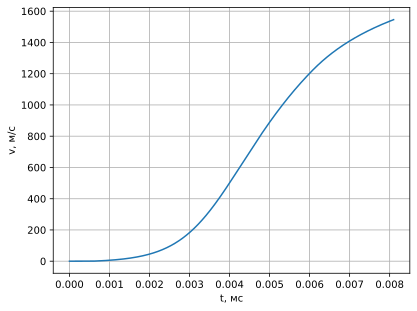

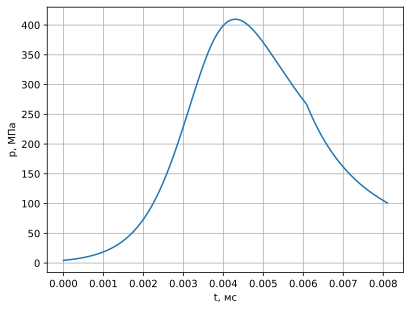

In [8]:
# графики для +15

plt.plot(t, v)
plt.xlabel('t, мс')
plt.ylabel('v, м/с')
plt.grid()
plt.show()

plt.plot(t, p/1e6)
plt.xlabel('t, мс')
plt.ylabel('p, МПа')
plt.grid()
plt.show()

# plt.plot(t, z_1)
# plt.grid()
# plt.show()

In [9]:
print('V_0 =',np.round(v[-1],0), 'м/с')
print('max баллистическое давление',max(p)/1e6)
print('дульное баллистическое давление' ,p[-1]/1e6)
# print('время начала движения', t[list(v).index(v[v>0][0])])
# print('время достижения макс. давления', t[list(p).index(max(p))] )
# print('время вылета снаряда', t[-1])

p_kn_max_15=max(p)*(1+1/2*(init['w_1'] + init['w_2'] + init['w_3'])/init['q']) / (1+1/3*(init['w_1'] + init['w_2'] + init['w_3'])/init['q'])
print('p_max_кн +15', int(p_kn_max_15/1e6) , 'МПа')

p_snar_max_15=p_kn_max_15/(1+1/2/init['q']*(init['w_1'] + init['w_2'] + init['w_3']))
print('p_max_снар +15', int(p_snar_max_15/1e6), 'МПа')


DeltA=50
p_m_kr=100
while np.abs(DeltA) > 5:
    P=98.0665
    N=0.937+0.161*(p_m_kr/P/k_kr)-0.0317*(p_m_kr/P/k_kr)**2+0.00214*(p_m_kr/P/k_kr)**3+(4000-150*8/1.037)/(1e5+(8/1.037)**4)+0.0165*(7.4/8)**2
    k_n_kn=1.02+0.035*((init['w_1']+init['w_2']+init['w_3'])/init['q']-0.5)**2
    P_m_kr=k_n_kn/N*p_kn_max_15
    DeltA=P_m_kr/1e6-p_m_kr
    p_m_kr=p_m_kr+DeltA/2
    
print('p_кр +15 =', int(P_m_kr/1e6*100/9.80665), 'атм;', int(P_m_kr/1e6), 'МПа')

V_0 = 1546.0 м/с
max баллистическое давление 409.76534587493603
дульное баллистическое давление 101.25632640009958
p_max_кн +15 458 МПа
p_max_снар +15 312 МПа
p_кр +15 = 4027 атм; 394 МПа


In [10]:
init['T_0']=323.15
res_50=Raschet(init).get_res()

init['T_0']=223.15
res_223=Raschet(init).get_res()

init['T_0']=288.15

In [11]:
print(res_223['v'][-1])
print(res_223['psi_1'][-1])
print(res_223['psi_2'][-1])

p_50=res_50['p']
p_kn_max_50=max(p_50)*(1+1/2*(init['w_1'] + init['w_2'] + init['w_3'])/init['q']) / (1+1/3*(init['w_1'] + init['w_2'] + init['w_3'])/init['q'])

p_snar_max_50=max(p_50)/(1+1/3*(init['w_1'] + init['w_2'] + init['w_3'])/init['q'])
print(p_snar_max_15/1e6)
print('p_m max при +50', max(p_50)/1e6)
print('p_max_кн', p_kn_max_50 /1e6)
print('p_max_снар', p_snar_max_50 /1e6*1.06)
print(max(res_50['p'])/1e6)

1403.4233964032524
1.0
1.0
312.6985151350863
p_m max при +50 483.75365260488894
p_max_кн 541.0503888832103
p_max_снар 391.3097908511407
483.75365260488894


# Крешерное давлене +50

In [12]:
DeltA=50
p_m_kr=100
while np.abs(DeltA) > 5:
    P=98.0665
    N=0.937+0.161*(p_m_kr/P/k_kr)-0.0317*(p_m_kr/P/k_kr)**2+0.00214*(p_m_kr/P/k_kr)**3+(4000-150*8/1.037)/(1e5+(8/1.037)**4)+0.0165*(7.4/8)**2
    k_n_kn=1.02+0.035*((init['w_1']+init['w_2']+init['w_3'])/init['q']-0.5)**2
    P_m_kr=k_n_kn/N*p_kn_max_50
    DeltA=P_m_kr/1e6-p_m_kr
    p_m_kr=p_m_kr+DeltA/2
    
print('p_кр +50 =', int(P_m_kr/1e6*100/9.80665), 'атм;', int(P_m_kr/1e6), 'МПа')

p_кр +50 = 4685 атм; 459 МПа
